## Load available keys

In [11]:
import ooiod

In [12]:
key_file = '/home/jovyan/repos/ooi-opendata/secrets/daxsoule.pickle'
keys = ooiod.secrets.load_keys(key_file)

You have:
    botpt


## Download a NetCDF file from OOI results server

In [90]:
netcdf_url = 'https://opendap.oceanobservatories.org/async_results/dax.soule@qc.cuny.edu/20191227T065318736Z-RS03ECAL-MJ03E-06-BOTPTA302-streamed-botpt_nano_sample/deployment0001_RS03ECAL-MJ03E-06-BOTPTA302-streamed-botpt_nano_sample_20141005T000000-20141005T235959.nc'
netcdf_filename = netcdf_url.split('/')[-1]

In [26]:
import wget

In [27]:
wget.download(netcdf_url);

## Write the original NetCDF file into Azure blob

In [48]:
from azure.storage.blob import BlockBlobService

In [49]:
if 'botpt' in keys:
    botpt_service = BlockBlobService('ooiopendata', sas_token = keys['botpt'])
else:
    raise Exception('Botpt container key not available')

In [50]:
botpt_service.create_blob_from_path('botpt', netcdf_filename, netcdf_filename, validate_content=True);

In [51]:
for blob in botpt_service.list_blobs('botpt'):
    print(blob.name)

deployment0001_RS03ECAL-MJ03E-06-BOTPTA302-streamed-botpt_nano_sample_20141005T000000-20141005T010000.nc
deployment0001_RS03ECAL-MJ03E-06-BOTPTA302-streamed-botpt_nano_sample_20141005T000000-20141005T235959.nc
rawNetCDF/deployment0001_RS03CCAL-MJ03F-05-BOTPTA301-streamed-botpt_nano_sample_20140905T000000-20141128T115959.950000.nc
rawNetCDF/deployment0001_RS03CCAL-MJ03F-05-BOTPTA301-streamed-botpt_nano_sample_20141005T000000-20141005T010000.nc
rawNetCDF/deployment0001_RS03ECAL-MJ03E-06-BOTPTA302-streamed-botpt_nano_sample_20141005T000000-20141005T010000.nc
rawNetCDF/deployment0001_RS03INT2-MJ03D-06-BOTPTA303-streamed-botpt_nano_sample_20140829T231732.975000-20141127T210000.100000.nc
rawNetCDF/deployment0001_RS03INT2-MJ03D-06-BOTPTA303-streamed-botpt_nano_sample_20141127T205959.900000-20141205T210000.100000.nc
rawNetCDF/deployment0001_RS03INT2-MJ03D-06-BOTPTA303-streamed-botpt_nano_sample_20150102T205959.900000-20150110T210000.100000.nc
rawNetCDF/deployment0001_RS03INT2-MJ03D-06-BOTPTA30

## Load the file into Xarray and save to ooiopendata

In [52]:
import xarray as xr
import zarr
import logging
logging.getLogger("azure.storage").setLevel(logging.CRITICAL)

In [86]:
ds = xr.open_dataset(netcdf_filename)
ds = ds.swap_dims({'obs': 'time'})
ds = ds.drop(['deployment','id', 'date_time_string', 'ingestion_timestamp', 'internal_timestamp','port_timestamp',
             'driver_timestamp', 'preferred_timestamp', 'provenance', 'time_sync_flag', 'bottom_pressure_qc_executed',
             'bottom_pressure_qc_results'])
del ds['bottom_pressure'].attrs['coordinates']
del ds['press_trans_temp'].attrs['coordinates']
del ds['sensor_id'].attrs['coordinates']
ds

<xarray.Dataset>
Dimensions:           (time: 86401)
Coordinates:
    obs               (time) int32 0 1 2 3 4 5 ... 86396 86397 86398 86399 86400
  * time              (time) datetime64[ns] 2014-10-05 ... 2014-10-05T23:59:59
Data variables:
    bottom_pressure   (time) float32 ...
    press_trans_temp  (time) float64 ...
    sensor_id         (time) object ...
Attributes:
    node:                               MJ03E
    comment:                            
    publisher_email:                    
    sourceUrl:                          http://oceanobservatories.org/
    collection_method:                  streamed
    stream:                             botpt_nano_sample
    featureType:                        point
    creator_email:                      
    publisher_name:                     Ocean Observatories Initiative
    date_modified:                      2019-12-27T06:53:29.162523
    keywords:                           
    cdm_data_type:                      Point
    references:                         More information can be found at http...
    Metadata_Conventions:               Unidata Dataset Discovery v1.0
    date_created:                       2019-12-27T06:53:29.162521
    id:                                 RS03ECAL-MJ03E-06-BOTPTA302-streamed-...
    requestUUID:                        f1ca252d-6630-4c41-a50f-37260ad3d47c
    contributor_role:                   
    summary:                            Dataset Generated by Stream Engine fr...
    keywords_vocabulary:                
    institution:                        Ocean Observatories Initiative
    naming_authority:                   org.oceanobservatories
    feature_Type:                       point
    infoUrl:                            http://oceanobservatories.org/
    license:                            
    contributor_name:                   
    uuid:                               f1ca252d-6630-4c41-a50f-37260ad3d47c
    creator_name:                       Ocean Observatories Initiative
    title:                              Data produced by Stream Engine versio...
    sensor:                             06-BOTPTA302
    standard_name_vocabulary:           NetCDF Climate and Forecast (CF) Meta...
    acknowledgement:                    
    Conventions:                        CF-1.6
    project:                            Ocean Observatories Initiative
    source:                             RS03ECAL-MJ03E-06-BOTPTA302-streamed-...
    publisher_url:                      http://oceanobservatories.org/
    creator_url:                        http://oceanobservatories.org/
    nodc_template_version:              NODC_NetCDF_TimeSeries_Orthogonal_Tem...
    subsite:                            RS03ECAL
    processing_level:                   L2
    history:                            2019-12-27T06:53:29.162489 generated ...
    Manufacturer:                       NOAA-PMEL
    ModelNumber:                        Custom
    SerialNumber:                       7
    Description:                        Bottom Pressure and Tilt: BOTPT Series A
    FirmwareVersion:                    Not specified.
    SoftwareVersion:                    Not specified.
    AssetUniqueID:                      ATAPL-58316-00004
    Notes:                              Not specified.
    Owner:                              University of Washington
    RemoteResources:                    []
    ShelfLifeExpirationDate:            Not specified.
    Mobile:                             False
    AssetManagementRecordLastModified:  2019-12-13T22:37:58.271000
    time_coverage_start:                2014-10-05T00:00:00
    time_coverage_end:                  2014-10-05T23:59:59
    time_coverage_resolution:           P1.00S
    geospatial_lat_min:                 45.93986
    geospatial_lat_max:                 45.93986
    geospatial_lat_units:               degrees_north
    geospatial_lat_resolution:          0.1
    geospatial_lon_min:                 -129.97417
 

### Create new NetCDF file

In [92]:
out = netcdf_url.split('/')[-1][:-3] + '_edit' + '.nc'
ds.to_netcdf(out)

In [34]:
ds.data_vars

Data variables:
    bottom_pressure              (time) float32 ...
    date_time_string             (time) object ...
    driver_timestamp             (time) datetime64[ns] ...
    ingestion_timestamp          (time) datetime64[ns] ...
    internal_timestamp           (time) datetime64[ns] ...
    port_timestamp               (time) datetime64[ns] ...
    preferred_timestamp          (time) object ...
    press_trans_temp             (time) float64 ...
    provenance                   (time) |S1 ...
    sensor_id                    (time) object ...
    time_sync_flag               (time) object ...
    bottom_pressure_qc_executed  (time) uint8 ...
    bottom_pressure_qc_results   (time) uint8 ...

### Calculate sample rate

In [35]:
import pandas as pd
df = ds.to_dataframe()
res = (pd.Series(df.index[1:]) - pd.Series(df.index[:-1])).value_counts()
res

00:00:01    86396
00:00:00        3
00:00:03        1
Name: obs, dtype: int64

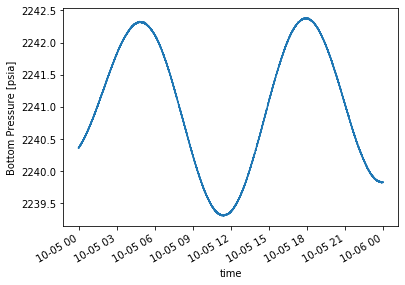

In [37]:
ds['bottom_pressure'].plot()

In [38]:
ds.source

'RS03ECAL-MJ03E-06-BOTPTA302-streamed-botpt_nano_sample'

In [39]:
'%s-%s-%s' % (ds.subsite,ds.node,ds.sensor)

'RS03ECAL-MJ03E-06-BOTPTA302'

In [40]:
ds['press_trans_temp']

<xarray.DataArray 'press_trans_temp' (time: 86401)>
array([3.335664, 3.33567 , 3.335676, ..., 3.342292, 3.342298, 3.342304])
Coordinates:
    obs      (time) int32 0 1 2 3 4 5 6 ... 86395 86396 86397 86398 86399 86400
  * time     (time) datetime64[ns] 2014-10-05 ... 2014-10-05T23:59:59
Attributes:
    comment:                  Nano-resolution Pressure Transducer Temperature...
    long_name:                Nano-Resolution Pressure Transducer Temperature
    coordinates:              time lat lon
    data_product_identifier:  NPTTEMP
    units:                    ºC

In [19]:
import textwrap
textwrap.wrap(ds['press_trans_temp'].comment)

['Nano-resolution Pressure Transducer Temperature is the internal',
 'transducer temperature that is used for onboard temperature-',
 'compensation of the pressure measurements produced by the BOTPT',
 'instrument.']

In [20]:
ds['bottom_pressure'].dims

('time',)

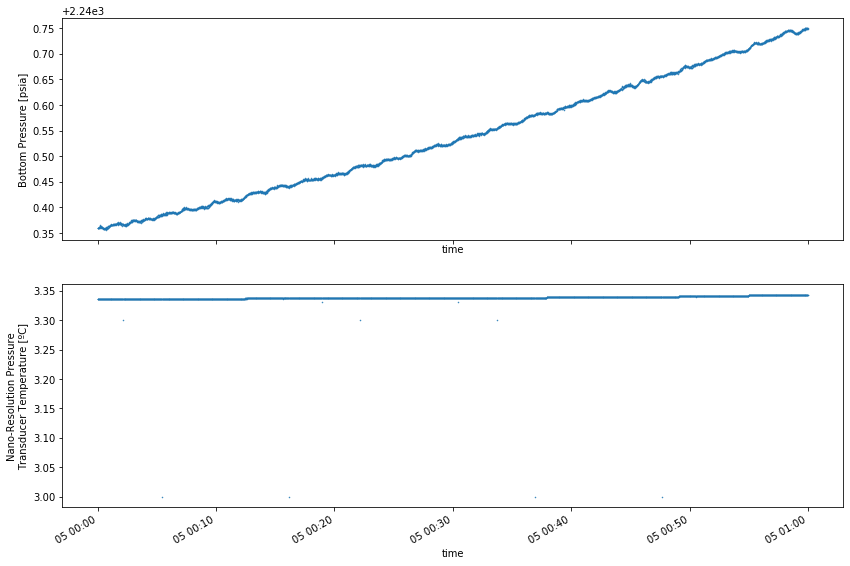

In [21]:
import matplotlib.pyplot as plt
fig, (ax1,ax2) = plt.subplots(2,1, sharex=True, figsize=(14,9))
ds['bottom_pressure'].plot(ax=ax1,linestyle='None',marker='.',markersize=1)
ds['press_trans_temp'].plot(ax=ax2,linestyle='None',marker='.',markersize=1)